In [2]:
import pandas as pd

# 'header=None' is used because the dataset does not have column names in the first row
df = pd.read_csv('diabetes.csv', header=None)

# number of rows and columns, column data types, and any missing values
df.info()

# This displays the first 5 rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       759 non-null    float64
 1   1       759 non-null    float64
 2   2       759 non-null    float64
 3   3       759 non-null    float64
 4   4       759 non-null    float64
 5   5       759 non-null    float64
 6   6       759 non-null    float64
 7   7       759 non-null    float64
 8   8       759 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.5 KB


,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [3]:
# Renaming the columns of the dataframe to 0 through 8
# This is  being done because the dataset didn't have column names
df.columns = list(range(9))

# Import MinMaxScaler from sklearn to scale all features between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Separate the input features (X) and the target/label (y)
# X contains all columns except the last one (column 8), which we drop
# y contains the last column (column 8), which indicates the outcome
X = df.drop(8, axis=1)
y = df[8].values


# This scales each feature so that its values fall between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


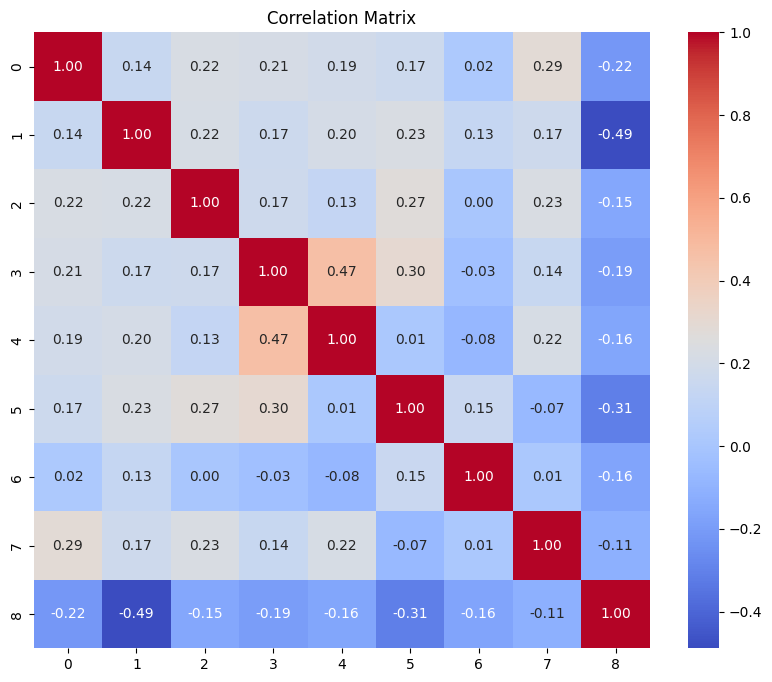

In [4]:
# Import seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all columns in the dataframe
# This tells us how strongly each feature is related to the others
# Correlation values range from -1 to 1
corr_matrix = df.corr()

# Setting the size of the heatmap plot
plt.figure(figsize=(10, 8))

# Using seaborn to create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Show the final plot
plt.show()


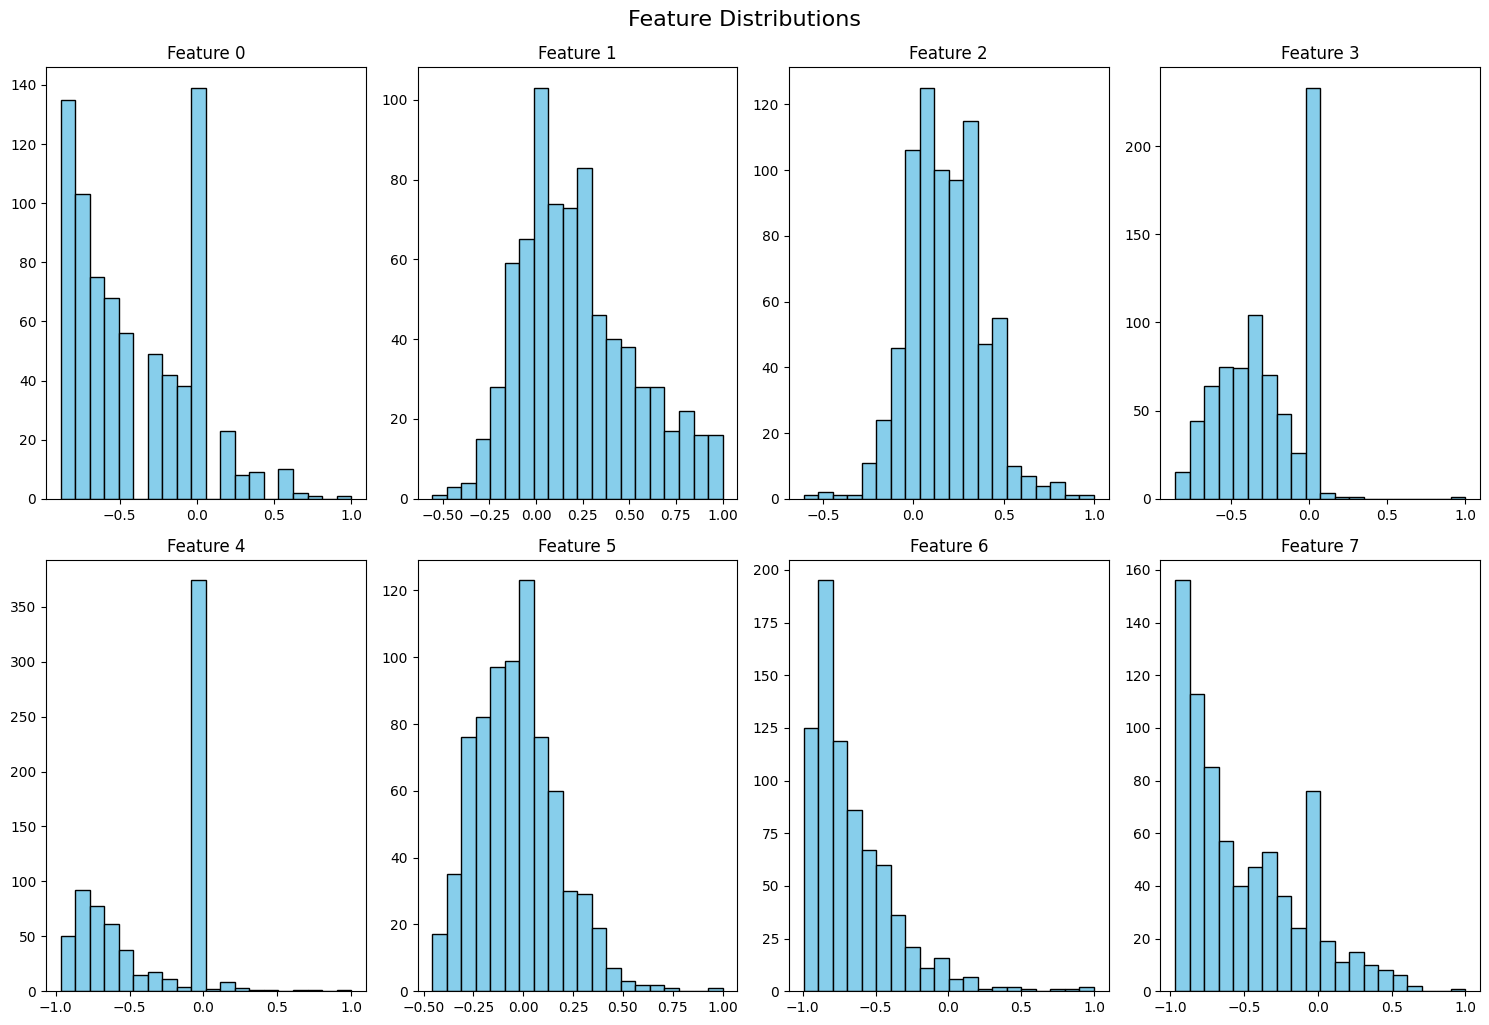

In [5]:
# Plotting histograms for features 0 to 7 (input features only, not the label)

# We are creating a new dataframe that contains only the input features
df_features = df.drop(8, axis=1)

plt.figure(figsize=(15, 10))

for i in range(8):
    # Create a subplots
    plt.subplot(2, 4, i+1)
    plt.hist(df[i], bins=20, color='skyblue', edgecolor='black')

    # Add a title above each histogram showing the feature number
    plt.title(f'Feature {i}')

    # Adjust layout to prevent overlapping text
    plt.tight_layout()

# Add a main title above all subplots
plt.suptitle('Feature Distributions', fontsize=16, y=1.02)

plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# 70% training, 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Basic feedforward neural network using PyTorch

In [8]:
# Import required PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Defining the Base Neural Network Model

# We are creating a class for a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        # Input layer to first hidden layer
        self.fc1 = nn.Linear(8, 32)

        # Second hidden layer
        self.fc2 = nn.Linear(32, 32)

        # Output layer
        self.fc3 = nn.Linear(32, 1)

        # Sigmoid activation for output layer
        self.activation = nn.Sigmoid()

    # Define how data flows through the network
    def forward(self, x):
        x = torch.relu(self.fc1(x))       # ReLU activation for first hidden layer
        x = torch.relu(self.fc2(x))       # ReLU for second hidden layer
        x = self.activation(self.fc3(x))  # Sigmoid at the output
        return x


# Model Setup
# Initialize the model
model = SimpleNN()

# Using Binary Cross Entropy Loss for binary classification (0 or 1)
criterion = nn.BCELoss()

# Using Stochastic Gradient Descent (SGD) as the optimizer with learning rate 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Prepare the Data for PyTorch
# Convert training and test data to PyTorch tensors
# We use .unsqueeze(1) to convert Y from shape (N,) to (N, 1) to match model output
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1)

# Wrap training tensors into a TensorDataset for batching
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)

# Use DataLoader to handle batching and shuffling for training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training Loop
# Train for 100 epochs
for epoch in range(100):
    model.train()

    # Loop over mini-batches
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()            # Clear previous gradients
        outputs = model(batch_X)         # Forward pass
        loss = criterion(outputs, batch_Y)  # Compute loss
        loss.backward()                  # Backpropagation
        optimizer.step()                 # Update weights

    # Print training loss for this epoch
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


# Evaluation on Test Set

model.eval()
with torch.no_grad():  # No gradient tracking needed for evaluation
    outputs = model(X_test_tensor)               # Get model predictions
    predictions = (outputs > 0.5).float()        # Convert probabilities to 0 or 1
    accuracy = (predictions == Y_test_tensor).float().mean().item()  # Calculate accuracy
    print(f"Test Accuracy: {accuracy}")


Epoch 1, Loss: 0.6865611672401428
Epoch 2, Loss: 0.6471141576766968
Epoch 3, Loss: 0.6659319400787354
Epoch 4, Loss: 0.6936105489730835
Epoch 5, Loss: 0.6707021594047546
Epoch 6, Loss: 0.6701585650444031
Epoch 7, Loss: 0.6524546146392822
Epoch 8, Loss: 0.6671422123908997
Epoch 9, Loss: 0.631852924823761
Epoch 10, Loss: 0.6258299350738525
Epoch 11, Loss: 0.7006191611289978
Epoch 12, Loss: 0.7202747464179993
Epoch 13, Loss: 0.5993752479553223
Epoch 14, Loss: 0.6633149981498718
Epoch 15, Loss: 0.6602921485900879
Epoch 16, Loss: 0.6135948896408081
Epoch 17, Loss: 0.7527167797088623
Epoch 18, Loss: 0.7095171213150024
Epoch 19, Loss: 0.6358255743980408
Epoch 20, Loss: 0.659405529499054
Epoch 21, Loss: 0.6830678582191467
Epoch 22, Loss: 0.5830658674240112
Epoch 23, Loss: 0.6817908883094788
Epoch 24, Loss: 0.6328849792480469
Epoch 25, Loss: 0.631017804145813
Epoch 26, Loss: 0.7373217940330505
Epoch 27, Loss: 0.6309094429016113
Epoch 28, Loss: 0.6847949028015137
Epoch 29, Loss: 0.70962810516357

Basic feedforward neural network using TensorFlow

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# We are defining a simple feedforward neural network using Keras Sequential API
# Input layer takes in 8 features, followed by two hidden layers of 32 neurons each
# ReLU is used in hidden layers
# Sigmoid is used in the output layer to get values between 0 and 1
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Using SGD (Stochastic Gradient Descent) as the optimizer
# Binary crossentropy is the loss function for binary classification
# Accuracy is used to measure how many predictions are correct
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Trainning the model on the training data
# Batch size of 32 means the model updates weights after every 32 samples
# Trained for 100 epochs (full passes through the training data)
history = model.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_split=0.0,
                    verbose=1)

# Evaluating the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6441 - loss: 0.6865   
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6355 - loss: 0.6812  
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6475 - loss: 0.6766 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6582 - loss: 0.6722 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.6651 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 0.6804 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - loss: 0.6693 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6203 - loss: 0.6772 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6091 - loss: 0.6804 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.6684 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6215 - loss: 0.6749 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

Modifying the implemented base Neural Network in pyTorch

In [12]:
# Import required PyTorch modules
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# The modified PyTorch neural network contains four hidden layers of 64 neurons each

class ModifiedNN(nn.Module):
    def __init__(self):
        super(ModifiedNN, self).__init__()

        # Input layer: 8 input features to 64 neurons
        self.fc1 = nn.Linear(8, 64)

        # Hidden layers: three more hidden layers, each with 64 neurons
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)

        # Output layer
        self.out = nn.Linear(64, 1)

        # Final activation function
        self.activation = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through the network with ReLU activations
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))

        # Output layer + sigmoid to produce final prediction
        x = self.activation(self.out(x))
        return x


# Instance of the model
model = ModifiedNN()

# Using Binary Cross Entropy loss
criterion = nn.BCELoss()

# Using Stochastic Gradient Descent optimizer with learning rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Converting training and test data to float32 tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1)


# Combine features and labels into a dataset object
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# Loop over 100 epochs (iterations over the full dataset)
for epoch in range(100):
    model.train()  # Set model to training mode
    total_loss = 0

    # Loop over batches
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()        # Clear previous gradients
        outputs = model(batch_X)     # Forward pass
        loss = criterion(outputs, batch_Y)  # Compute loss
        loss.backward()              # Backward pass (compute gradients)
        optimizer.step()             # Update weights
        total_loss += loss.item()    # Accumulate loss

    # Calculate and print average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No need to compute gradients for evaluation
    outputs = model(X_test_tensor)           # Forward pass on test data
    predictions = (outputs > 0.5).float()    # Threshold probabilities to get class labels (0 or 1)
    accuracy = (predictions == Y_test_tensor).float().mean().item()  # Compute accuracy
    print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1, Loss: 0.6962
Epoch 2, Loss: 0.6903
Epoch 3, Loss: 0.6856
Epoch 4, Loss: 0.6819
Epoch 5, Loss: 0.6774
Epoch 6, Loss: 0.6735
Epoch 7, Loss: 0.6715
Epoch 8, Loss: 0.6691
Epoch 9, Loss: 0.6654
Epoch 10, Loss: 0.6643
Epoch 11, Loss: 0.6622
Epoch 12, Loss: 0.6606
Epoch 13, Loss: 0.6597
Epoch 14, Loss: 0.6582
Epoch 15, Loss: 0.6558
Epoch 16, Loss: 0.6562
Epoch 17, Loss: 0.6565
Epoch 18, Loss: 0.6533
Epoch 19, Loss: 0.6542
Epoch 20, Loss: 0.6527
Epoch 21, Loss: 0.6521
Epoch 22, Loss: 0.6517
Epoch 23, Loss: 0.6519
Epoch 24, Loss: 0.6547
Epoch 25, Loss: 0.6520
Epoch 26, Loss: 0.6506
Epoch 27, Loss: 0.6516
Epoch 28, Loss: 0.6508
Epoch 29, Loss: 0.6507
Epoch 30, Loss: 0.6499
Epoch 31, Loss: 0.6510
Epoch 32, Loss: 0.6516
Epoch 33, Loss: 0.6536
Epoch 34, Loss: 0.6515
Epoch 35, Loss: 0.6521
Epoch 36, Loss: 0.6500
Epoch 37, Loss: 0.6534
Epoch 38, Loss: 0.6506
Epoch 39, Loss: 0.6512
Epoch 40, Loss: 0.6519
Epoch 41, Loss: 0.6512
Epoch 42, Loss: 0.6511
Epoch 43, Loss: 0.6511
Epoch 44, Loss: 0.65

Modifying the implemented base Neural Network in Tensorflow

In [13]:
# Import necessary modules from TensorFlow Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Defining the modified Neural Network model with four hidden layers of 64 neurons each
# Input layer takes in 8 features, followed by 3 hidden layers of 64 neurons each
# ReLU is used in hidden layers
# Sigmoid is used in the output layer to get values between 0 and 1
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Using SGD (Stochastic Gradient Descent) as the optimizer
# Binary crossentropy is the loss function for binary classification
# Accuracy is used to measure how many predictions are correct
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Trainning the model on the training data
# Batch size of 32 means the model updates weights after every 32 samples
# Trained for 100 epochs (full passes through the training data)
history = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.0,
    verbose=1
)


# Evaluate model performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4475 - loss: 0.6963  
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5599 - loss: 0.6897 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6214 - loss: 0.6859 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6360 - loss: 0.6805 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6404 - loss: 0.6754 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6613 - loss: 0.6690 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 0.6652 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.6688 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.6596 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6295 - loss: 0.6652 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6487 - loss: 0.6566 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Compare the performance of the modified model with the base model.

In PyTorch, the base model had a test accuracy of about 67.5%, while the modified PyTorch model also achieved a test accuracy of 67.5%. Although there was no change in performance in this specific setup, experimenting with different combinations of hidden layers, neuron counts, or optimization techniques might help achieve better results in future iterations.

In TensorFlow, the base model had a test accuracy of around 73.2%, while the modified model with four hidden layers performed much better, achieving a test accuracy of 81.1%. This shows that in TensorFlow, increasing the number of layers and neurons helped the model learn better and generalize well on the test set.

Write a conclusion explaining the effects of the changes made.

After modifying the neural network architectures by increasing the number of hidden layers and neurons, we observed differing outcomes across the two frameworks. In the PyTorch model, the added complexity did not result in a noticeable improvement in performance compared to the base version. However, in the TensorFlow implementation, the same architectural enhancements led to a clear increase in test accuracy.

This suggests that while deeper models can be beneficial, the effectiveness of such changes may depend on the framework used, the optimization process, and the data characteristics.